In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [112]:
fn = '../OFC_data/EC99_preprocessedDuringContinuous_6mA_Right_FreqBands.mat'
dat = h5py.File(fn, 'r')

In [91]:
# # Print keys of groups
# print("Keys of groups:")
# group_keys = list(dat.keys())
# print('\n'.join(group_keys))

# Print keys of datasets
print("\nKeys of datasets:")
dataset_keys = [name for name in dat]
print('\n'.join(dataset_keys))


Keys of datasets:
#refs#
Fs
allRejectedChans
artifactBufferAfter
artifactBufferBefore
artifactEnds
artifactStarts
dsFs
finalVerifiedChanNames
finalVerifiedRegions
numVerifiedChans
patientID
plotStimEnd
plotStimStart
preprocessedStimData
regionNames
rejectionTimes
removeOrReplace
selectVerifiedAnatomy
stimFreq


In [4]:
len(['OFG1','OFG2','OFG3','OFG4','OFG5','OFG6','OFG7',
            'OFG8','OFG9','OFG10','OFG11','OFG12','OFG13','OFG14','OFG15',
            'OFG16','OFG17','OFG18','OFG19','OFG20','OFG21','OFG22','OFG23',
            'OFG24','OFG25','OFG26','OFG27','OFG28','OFG29','OFG30','OFG31',
            'OFG32','OFG33','OFG34','OFG35','OFG36','OFG37','OFG38','OFG39',
            'OFG40','OFG41','OFG42','OFG43','OFG44','OFG45','OFG46','OFG47',
            'OFG48','OFG49','OFG50','OFG51','OFG52','OFG53','OFG54','OFG55',
            'OFG56','OFG57','OFG58','OFG59','OFG60','OFG61','OFG62','OFG63',
            'OFG64','AD1','AD2','AD3','AD4','AD5','AD6','HD1','HD2','HD3',
            'HD4','CD3','CD4','ID1','ID2','ID3','ID4','ID5'])

81

In [103]:
selectVerifiedAnatomy = dat['selectVerifiedAnatomy']
# selectVerifiedAnatomy = [h5py.h5r.get_name(selectVerifiedAnatomy[i][0], dat.id) for i in range(len(selectVerifiedAnatomy))]
# selectVerifiedAnatomy = [dat[i][:] for i in selectVerifiedAnatomy]

In [106]:
selectVerifiedAnatomy

<HDF5 dataset "selectVerifiedAnatomy": shape (4, 17), type "|O">

In [94]:
len(selectVerifiedAnatomy)

4

In [109]:
chanNames = dat['finalVerifiedChanNames']
chanNames_refname = [h5py.h5r.get_name(chanNames[i][0], dat.id) for i in range(len(chanNames))]

In [116]:
chanNames_refname

[b'/#refs#/b',
 b'/#refs#/c',
 b'/#refs#/d',
 b'/#refs#/e',
 b'/#refs#/f',
 b'/#refs#/g',
 b'/#refs#/h',
 b'/#refs#/i',
 b'/#refs#/j',
 b'/#refs#/k',
 b'/#refs#/l',
 b'/#refs#/m',
 b'/#refs#/n',
 b'/#refs#/o',
 b'/#refs#/p',
 b'/#refs#/q',
 b'/#refs#/r']

In [96]:
total_chanNames = [dat[i][:] for i in chanNames_refname]
# total_chanNames = np.unique(total_chanNames)
# print(total_chanNames), len(total_chanNames)

In [117]:
dat[chanNames_refname[0]]

<HDF5 dataset "b": shape (4, 1), type "<u2">

In [120]:
[u''.join(chr(c) for c in dat[obj_ref]) for obj_ref in chanNames_refname]

['ROF1',
 'ROF2',
 'RH1',
 'RH2',
 'RH3',
 'RH4',
 'RC1',
 'RC2',
 'RI1',
 'RI2',
 'RI3',
 'LH2',
 'LH3',
 'LC2',
 'LI1',
 'LI2',
 'LI3']

In [113]:
len(total_chanNames), #total_chanNames

(17,)

In [51]:
names = dat['regionNames']
names_refname = [h5py.h5r.get_name(names[i][0], dat.id) for i in range(len(names))]

In [42]:
names_refname

[b'/#refs#/w', b'/#refs#/x', b'/#refs#/y', b'/#refs#/z', b'/#refs#/A']

In [64]:
total_names = np.concatenate([dat[i][:] for i in names_refname])
total_names = np.unique(total_names)
total_names.shape, len(total_names)

((24,), 24)

In [60]:
numVerified = dat['numVerifiedChans']
numVerified[0]

array([21.])

In [100]:
data = np.array(dat['preprocessedStimData'])
data.shape

(194565, 17)

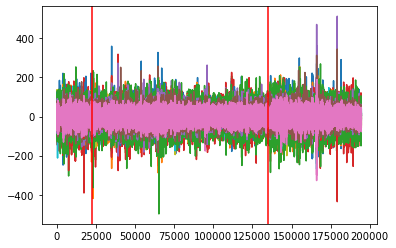

In [101]:
for i in range(data.shape[-1]):
    plt.plot(data[:, i])
plt.axvline(dat['plotStimStart'][:][0][0] * 512 / 16384, color='red')
plt.axvline(dat['plotStimEnd'][:][0][0] * 512 / 16384, color='red')

In [72]:
dat['plotStimStart'][:], dat['plotStimEnd'][:]

(array([[456642.]]), array([[2153093.]]))